<a href="https://colab.research.google.com/github/GattupalliMonica/projects/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease Prediction using ANN**








In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dropout
from tensorflow import keras 
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold,cross_val_predict
%matplotlib inline 

In [ ]:
dataread=pd.read_csv("heart.csv",dtype=float)
dataread_f=pd.read_csv("heart_f.csv",dtype=float)
dataread_m=pd.read_csv("heart_m.csv",dtype=float)

In [ ]:
dataread.shape


(303, 14)

In [ ]:
dataread_f.shape


(96, 14)

In [ ]:
dataread_m.shape

(207, 14)

In [ ]:
dataread.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [ ]:
dataread_f.head(5)
dataread_f.shape

(96, 14)

In [ ]:
dataread_m.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
3,57.0,1.0,0.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
4,44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0


In [ ]:
dataread.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataread_f.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,96.000000,96.0,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000
mean,55.677083,0.0,1.041667,133.083333,261.302083,0.125000,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.12500,0.750000
std,9.409396,0.0,0.972427,19.311119,65.088946,0.332455,0.557150,20.047969,0.422503,1.119844,0.593736,0.881026,0.44129,0.435286
min,34.000000,0.0,0.000000,94.000000,141.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,49.750000,0.0,0.000000,120.000000,214.750000,0.000000,0.000000,141.250000,0.000000,0.000000,1.000000,0.000000,2.00000,0.750000
50%,57.000000,0.0,1.000000,131.000000,253.000000,0.000000,1.000000,157.000000,0.000000,0.600000,1.000000,0.000000,2.00000,1.000000
75%,63.000000,0.0,2.000000,140.000000,296.750000,0.000000,1.000000,165.000000,0.000000,1.400000,2.000000,1.000000,2.00000,1.000000
max,76.000000,0.0,3.000000,200.000000,564.000000,1.000000,2.000000,192.000000,1.000000,6.200000,2.000000,3.000000,3.00000,1.000000


In [ ]:
dataread_m.describe()
dataread_m.shape

(207, 14)

In [ ]:
 dataread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [ ]:
dataread_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       96 non-null     float64
 1   sex       96 non-null     float64
 2   cp        96 non-null     float64
 3   trestbps  96 non-null     float64
 4   chol      96 non-null     float64
 5   fbs       96 non-null     float64
 6   restecg   96 non-null     float64
 7   thalach   96 non-null     float64
 8   exang     96 non-null     float64
 9   oldpeak   96 non-null     float64
 10  slope     96 non-null     float64
 11  ca        96 non-null     float64
 12  thal      96 non-null     float64
 13  target    96 non-null     float64
dtypes: float64(14)
memory usage: 10.6 KB


In [ ]:
dataread_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       207 non-null    float64
 1   sex       207 non-null    float64
 2   cp        207 non-null    float64
 3   trestbps  207 non-null    float64
 4   chol      207 non-null    float64
 5   fbs       207 non-null    float64
 6   restecg   207 non-null    float64
 7   thalach   207 non-null    float64
 8   exang     207 non-null    float64
 9   oldpeak   207 non-null    float64
 10  slope     207 non-null    float64
 11  ca        207 non-null    float64
 12  thal      207 non-null    float64
 13  target    207 non-null    float64
dtypes: float64(14)
memory usage: 22.8 KB


In [ ]:
dataread.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
dataread_f.isnull().sum()
dataread_f.shape

(96, 14)

In [ ]:
dataread_m.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

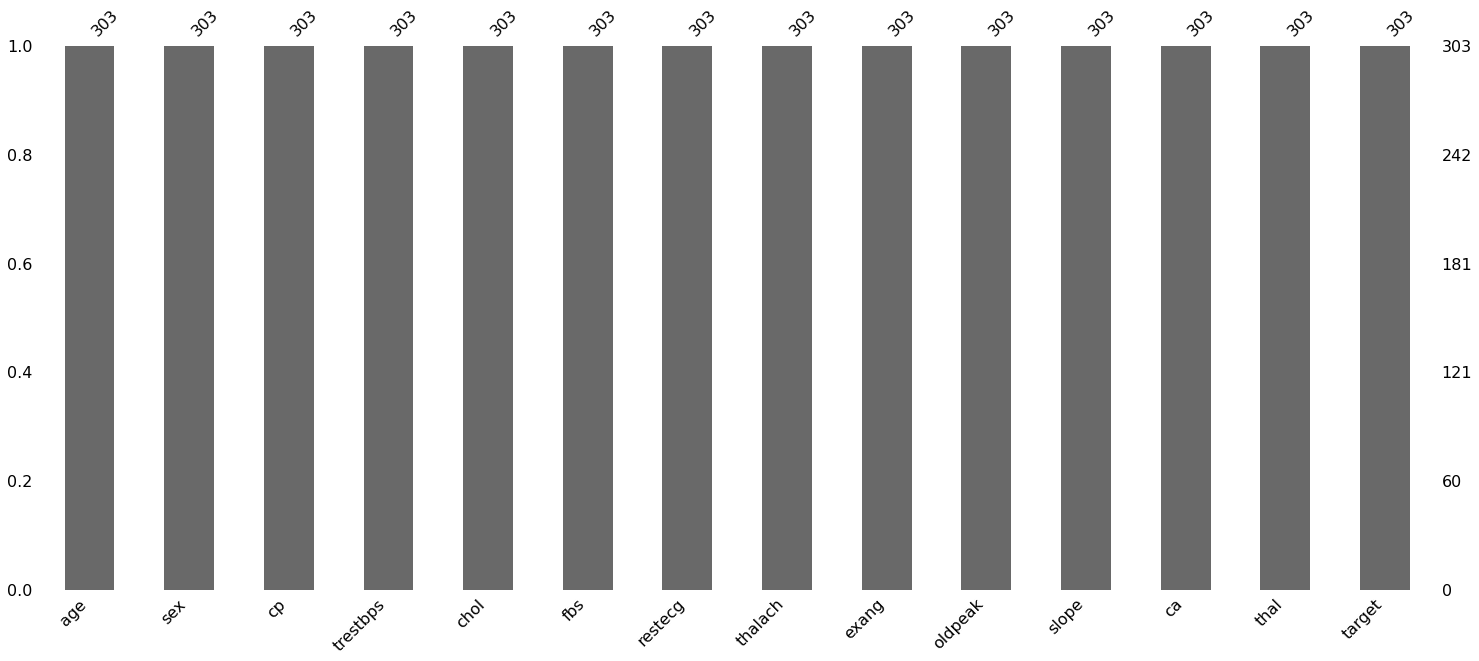

In [ ]:
import missingno as mns
mns.bar(dataread)
plt.show()

Histogram plot for 14 attributes

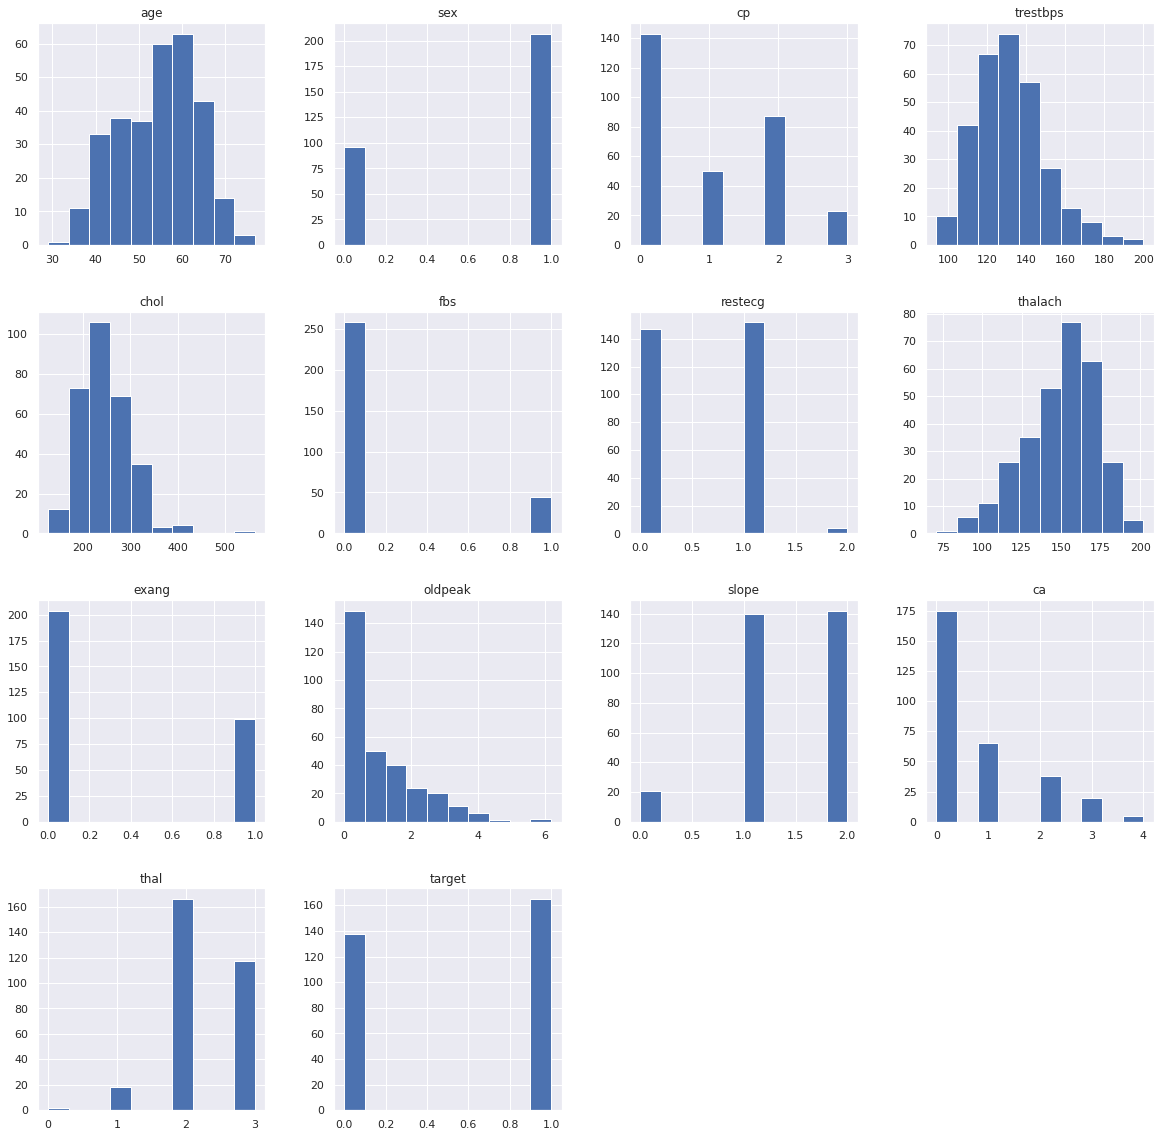

In [ ]:
sns.set()
p = dataread.hist(figsize = (20,20))

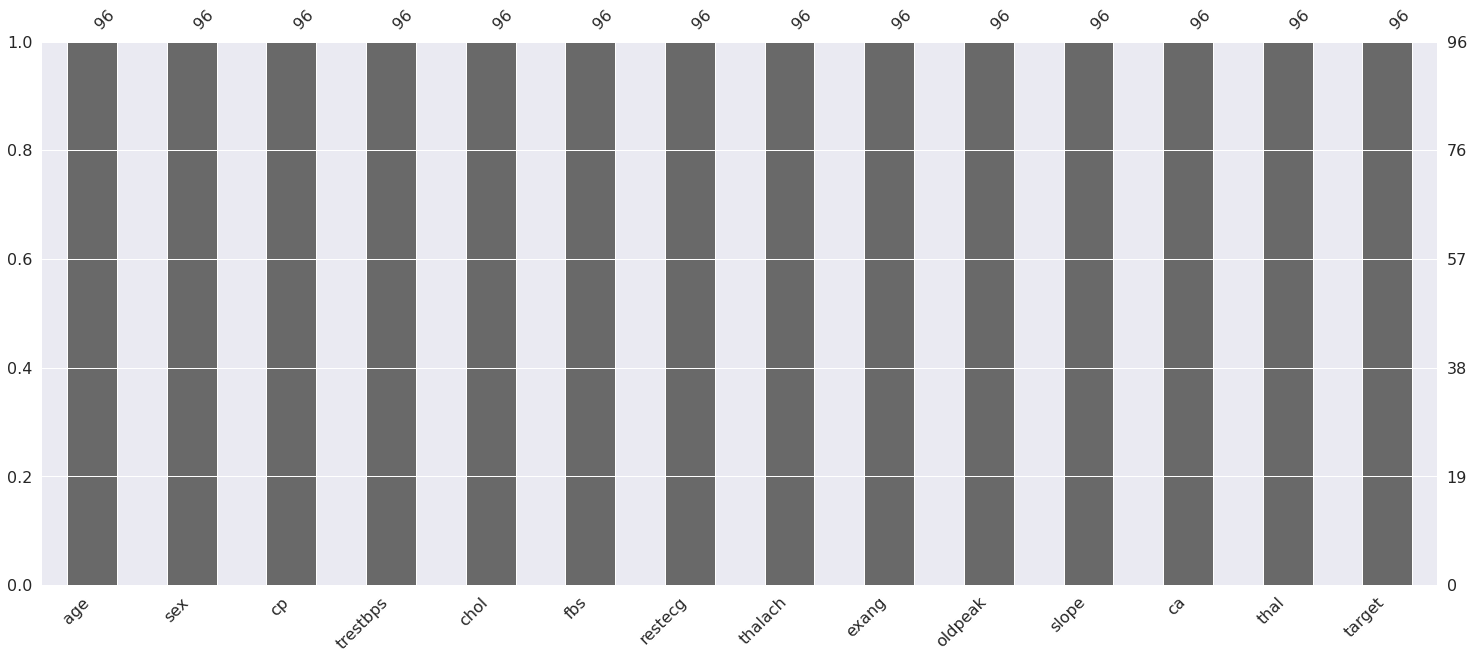

In [ ]:
import missingno as mns
mns.bar(dataread_f)
plt.show()

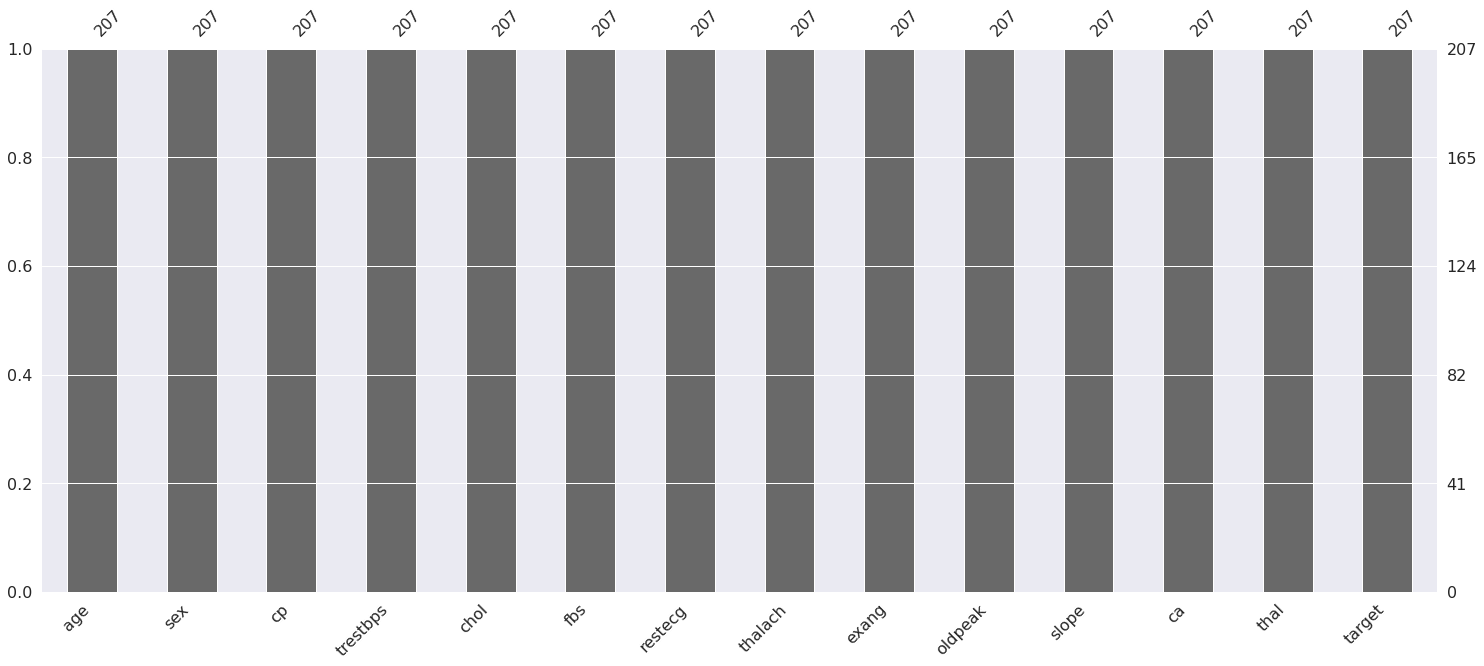

In [ ]:
import missingno as mns
mns.bar(dataread_m)
plt.show()

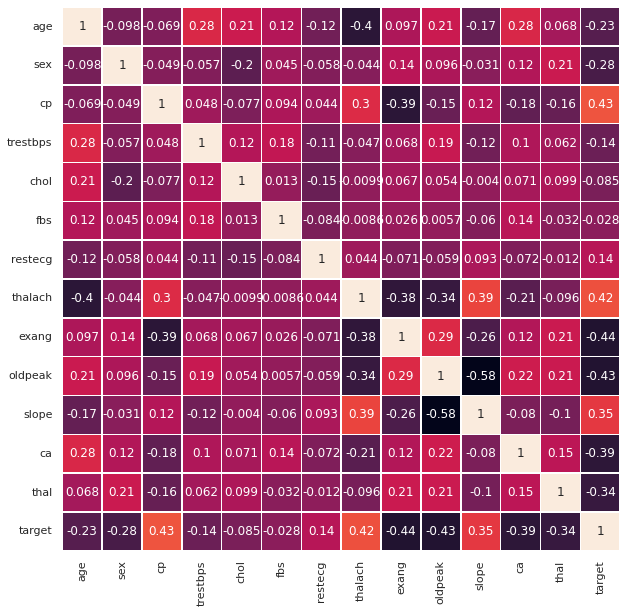

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataread.corr(),cbar=False,annot=True,linewidths=.5, ax=ax)


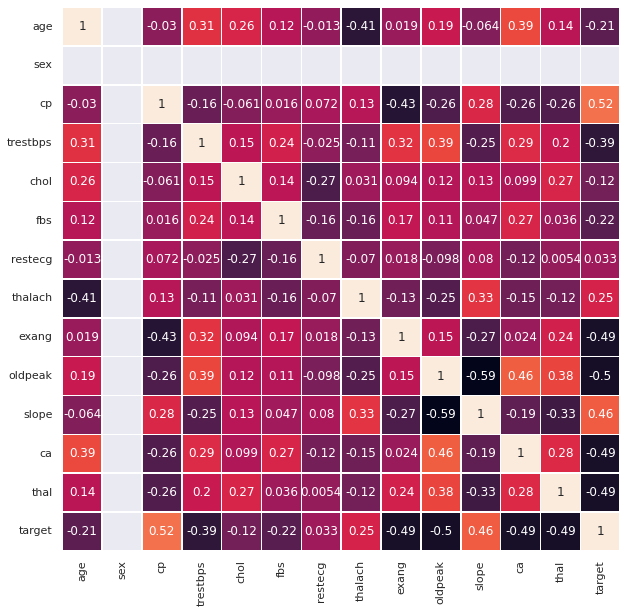

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataread_f.corr(),cbar=False,annot=True,linewidths=.5, ax=ax)

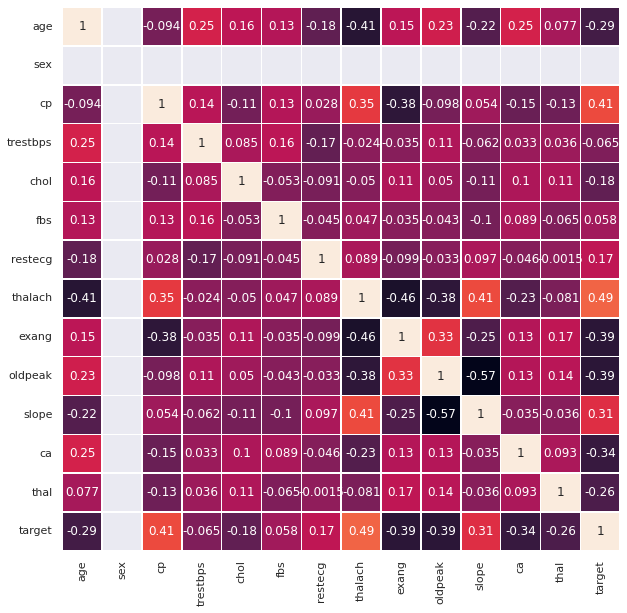

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataread_m.corr(),cbar=False,annot=True,linewidths=.5, ax=ax)

In [ ]:
dataread.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

In [ ]:
dataread_f.var()

age           88.536732
sex            0.000000
cp             0.945614
trestbps     372.919298
chol        4236.570943
fbs            0.110526
restecg        0.310417
thalach      401.921053
exang          0.178509
oldpeak        1.254052
slope          0.352522
ca             0.776206
thal           0.194737
target         0.189474
dtype: float64

In [ ]:
dataread_m.shape

(207, 14)

In [ ]:
dataread_m.var()

age           78.921955
sex            0.000000
cp             1.121617
trestbps     277.497162
chol        1830.333052
fbs            0.134656
restecg        0.260870
thalach      582.299470
exang          0.234745
oldpeak        1.379760
slope          0.393603
ca             1.153651
thal           0.435533
target         0.248628
dtype: float64

**Outlier detection **

In [ ]:
z = np.abs(stats.zscore(dataread))
print(z)
threshold = 3
print(np.where(z > 3))

[[0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 [1.91531289 0.68100522 1.00257707 ... 0.71442887 0.51292188 0.91452919]
 [1.47415758 1.46841752 0.03203122 ... 0.71442887 0.51292188 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]
(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281]), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12]))


In [ ]:

dataread = dataread[(z < 3).all(axis=1)]


In [ ]:
dataread.shape

(287, 14)

In [ ]:
dataread_f.shape

(96, 14)

In [ ]:
dataread_m.shape

(207, 14)

In [ ]:
dataread.groupby(by='sex').size()

sex
0.0     89
1.0    198
dtype: int64

**Standadizing data**

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(dataread.drop(['target'], axis=1))        
x.shape

(287, 13)

In [ ]:
y = dataread['target']
y=y.to_numpy()

In [ ]:
dataread.shape

(287, 14)

In [ ]:
sc = StandardScaler()
x_f = sc.fit_transform(dataread_f.drop(['target'], axis=1))        
x_f.shape

(96, 13)

In [ ]:
y_f = dataread_f['target']
y_f=y_f.to_numpy()

In [ ]:
dataread_f.shape

(96, 14)

In [ ]:
sc = StandardScaler()
x_m = sc.fit_transform(dataread_m.drop(['target'], axis=1))        
x_m.shape

(207, 13)

In [ ]:
y_m = dataread_m['target']
y_m=y_m.to_numpy()

In [ ]:
dataread_m.shape

(207, 14)

**Model Architecture -1(Whole dataset)**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=True)    

In [ ]:
model = tf.keras.Sequential([
    layers.Dense(20, activation='relu', name='layer1'),
    Dropout(0.2),
    layers.Dense(25, activation='relu', name='layer2'),
    Dropout(0.2),
    layers.Dense(30, activation='relu', name='layer3'),
    Dropout(0.5),
    #layers.Dense(35, activation='relu', name='layer4'),
    #Dropout(0.5),
    layers.Dense(10, activation='relu', name='layer4'),
    layers.Dense(1, activation='sigmoid', name='f-layer'),
])


In [ ]:

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, batch_size = 32, epochs = 90,verbose=2)


Epoch 1/90
7/7 - 1s - loss: 0.6983 - accuracy: 0.5200 - 1s/epoch - 144ms/step
Epoch 2/90
7/7 - 0s - loss: 0.6742 - accuracy: 0.5550 - 20ms/epoch - 3ms/step
Epoch 3/90
7/7 - 0s - loss: 0.6737 - accuracy: 0.6000 - 19ms/epoch - 3ms/step
Epoch 4/90
7/7 - 0s - loss: 0.6668 - accuracy: 0.6000 - 19ms/epoch - 3ms/step
Epoch 5/90
7/7 - 0s - loss: 0.6404 - accuracy: 0.6600 - 23ms/epoch - 3ms/step
Epoch 6/90
7/7 - 0s - loss: 0.6220 - accuracy: 0.6500 - 18ms/epoch - 3ms/step
Epoch 7/90
7/7 - 0s - loss: 0.6303 - accuracy: 0.5850 - 20ms/epoch - 3ms/step
Epoch 8/90
7/7 - 0s - loss: 0.6137 - accuracy: 0.6350 - 18ms/epoch - 3ms/step
Epoch 9/90
7/7 - 0s - loss: 0.5927 - accuracy: 0.6750 - 18ms/epoch - 3ms/step
Epoch 10/90
7/7 - 0s - loss: 0.5980 - accuracy: 0.6600 - 21ms/epoch - 3ms/step
Epoch 11/90
7/7 - 0s - loss: 0.5846 - accuracy: 0.6700 - 17ms/epoch - 2ms/step
Epoch 12/90
7/7 - 0s - loss: 0.5864 - accuracy: 0.7050 - 16ms/epoch - 2ms/step
Epoch 13/90
7/7 - 0s - loss: 0.5680 - accuracy: 0.6700 - 24ms

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 20)                280       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 layer2 (Dense)              (None, 25)                525       
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 layer3 (Dense)              (None, 30)                780       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 layer4 (Dense)              (None, 10)                3

In [ ]:
scores = model.evaluate(x_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

3/3 [==============================] - 0s 4ms/step - loss: 0.3796 - accuracy: 0.8736
Accuracy: 87.36%


**Model Architecture_f-2(Female patients dataset)**

In [ ]:

x_f_train, x_f_test, y_f_train, y_f_test = train_test_split(x_f, y_f, test_size=0.3, random_state=True)    

In [ ]:
model_f = tf.keras.Sequential([
    layers.Dense(20, activation='relu', name='layer1'),
    Dropout(0.2),
    layers.Dense(25, activation='relu', name='layer2'),
    Dropout(0.2),
    layers.Dense(30, activation='relu', name='layer3'),
    Dropout(0.5),
    
    layers.Dense(10, activation='relu', name='layer4'),
    layers.Dense(1, activation='sigmoid', name='f-layer'),
])


In [ ]:
model_f.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])


In [ ]:
model_f.fit(x_f_train, y_f_train, batch_size = 32, epochs = 90,verbose=2)

Epoch 1/90
3/3 - 1s - loss: 0.8341 - accuracy: 0.2836 - 710ms/epoch - 237ms/step
Epoch 2/90
3/3 - 0s - loss: 0.7656 - accuracy: 0.3731 - 13ms/epoch - 4ms/step
Epoch 3/90
3/3 - 0s - loss: 0.7605 - accuracy: 0.4776 - 11ms/epoch - 4ms/step
Epoch 4/90
3/3 - 0s - loss: 0.7159 - accuracy: 0.4627 - 9ms/epoch - 3ms/step
Epoch 5/90
3/3 - 0s - loss: 0.6548 - accuracy: 0.5672 - 13ms/epoch - 4ms/step
Epoch 6/90
3/3 - 0s - loss: 0.6318 - accuracy: 0.6119 - 13ms/epoch - 4ms/step
Epoch 7/90
3/3 - 0s - loss: 0.6253 - accuracy: 0.7015 - 12ms/epoch - 4ms/step
Epoch 8/90
3/3 - 0s - loss: 0.6136 - accuracy: 0.6567 - 11ms/epoch - 4ms/step
Epoch 9/90
3/3 - 0s - loss: 0.5632 - accuracy: 0.7761 - 9ms/epoch - 3ms/step
Epoch 10/90
3/3 - 0s - loss: 0.6413 - accuracy: 0.6567 - 9ms/epoch - 3ms/step
Epoch 11/90
3/3 - 0s - loss: 0.5989 - accuracy: 0.7612 - 9ms/epoch - 3ms/step
Epoch 12/90
3/3 - 0s - loss: 0.6115 - accuracy: 0.7313 - 12ms/epoch - 4ms/step
Epoch 13/90
3/3 - 0s - loss: 0.5578 - accuracy: 0.8060 - 12ms/

In [ ]:
scores = model_f.evaluate(x_f_test, y_f_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 0s 143ms/step - loss: 0.5810 - accuracy: 0.8621
Accuracy: 86.21%


**Model Achitecture_m-3 (Male patients dataset)**

In [ ]:
x_m_train, x_m_test, y_m_train, y_m_test = train_test_split(x_m, y_m, test_size=0.3, random_state=True) 

In [ ]:
model_m = tf.keras.Sequential([
    layers.Dense(20, activation='relu', name='layer1'),
    Dropout(0.2),
    layers.Dense(25, activation='relu', name='layer2'),
    Dropout(0.2),
    layers.Dense(30, activation='relu', name='layer3'),
    Dropout(0.5),
    layers.Dense(10, activation='relu', name='layer5'),
    layers.Dense(1, activation='sigmoid', name='f-layer'),
])

In [ ]:

model_m.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
model_m.fit(x_m_train, y_m_train, batch_size = 32, epochs = 90,verbose=2)

Epoch 1/90
5/5 - 1s - loss: 0.7046 - accuracy: 0.5625 - 754ms/epoch - 151ms/step
Epoch 2/90
5/5 - 0s - loss: 0.6676 - accuracy: 0.5486 - 16ms/epoch - 3ms/step
Epoch 3/90
5/5 - 0s - loss: 0.6454 - accuracy: 0.5417 - 15ms/epoch - 3ms/step
Epoch 4/90
5/5 - 0s - loss: 0.6285 - accuracy: 0.6458 - 14ms/epoch - 3ms/step
Epoch 5/90
5/5 - 0s - loss: 0.6291 - accuracy: 0.6458 - 16ms/epoch - 3ms/step
Epoch 6/90
5/5 - 0s - loss: 0.6589 - accuracy: 0.5347 - 20ms/epoch - 4ms/step
Epoch 7/90
5/5 - 0s - loss: 0.6300 - accuracy: 0.6181 - 13ms/epoch - 3ms/step
Epoch 8/90
5/5 - 0s - loss: 0.6398 - accuracy: 0.6042 - 14ms/epoch - 3ms/step
Epoch 9/90
5/5 - 0s - loss: 0.6324 - accuracy: 0.6042 - 13ms/epoch - 3ms/step
Epoch 10/90
5/5 - 0s - loss: 0.6113 - accuracy: 0.6667 - 14ms/epoch - 3ms/step
Epoch 11/90
5/5 - 0s - loss: 0.5932 - accuracy: 0.6597 - 14ms/epoch - 3ms/step
Epoch 12/90
5/5 - 0s - loss: 0.6079 - accuracy: 0.6667 - 14ms/epoch - 3ms/step
Epoch 13/90
5/5 - 0s - loss: 0.6082 - accuracy: 0.6111 - 1

In [ ]:
scores = model_m.evaluate(x_m_test, y_m_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

2/2 [==============================] - 0s 10ms/step - loss: 0.6669 - accuracy: 0.7302
Accuracy: 73.02%
